In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib  import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=40, n_features=2, centers=[[1,1], [3,3]])

In [4]:
data

(array([[ 1.40483602,  0.83170867],
        [ 2.84943415,  1.93202747],
        [ 2.40459957,  2.63546522],
        [ 2.32904539,  3.16277315],
        [ 0.09117503,  0.36331769],
        [ 1.06452301,  2.04734977],
        [ 2.07590482,  3.21665464],
        [ 1.81746974,  2.27435711],
        [ 1.99486258,  1.06096938],
        [ 2.81325904,  2.6412782 ],
        [ 3.41944593,  1.83459484],
        [ 1.68603155,  2.42207758],
        [ 0.29622202,  2.00885785],
        [ 3.00311636,  2.06026223],
        [ 1.43566095, -0.05705119],
        [ 0.42416564,  1.65291451],
        [ 1.89939253,  2.50487213],
        [ 1.11650187, -0.02829432],
        [ 1.52945066,  1.73110723],
        [ 0.69285487,  0.70017817],
        [ 1.15537583,  0.36330986],
        [ 5.09482459,  3.14172107],
        [ 0.61973721,  1.51971986],
        [ 2.04316815,  3.21434734],
        [ 0.09569422,  0.79766131],
        [ 2.49303918,  3.10912906],
        [ 2.49324397,  3.59927227],
        [ 0.55837184,  1.339

In [5]:
X = data[0]
y = data[1]

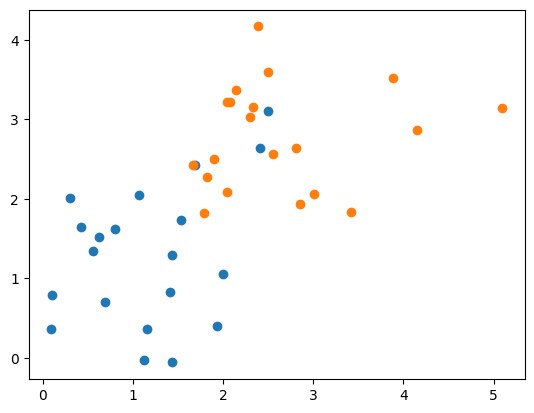

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], label="Cluster 1")
plt.scatter(X[y==1,0], X[y==1,1], label="Cluster 2")
plt.legend
plt.show()

In [7]:
def find_optimal_clusters(data, n_clusters=10):
    silhouette_scores = []
    for i in range(2, n_clusters+1):
        model = AgglomerativeClustering(n_clusters=i)
        pred = model.fit_predict(data)
        score = silhouette_score(data, pred)
        silhouette_scores.append(score)
        best_clusters = np.argmax(silhouette_scores)+2
        return best_clusters

In [8]:
best_n_clusters = find_optimal_clusters(X)

In [9]:
agg_model = AgglomerativeClustering(n_clusters=best_n_clusters)

In [10]:
labels = agg_model.fit_predict(X)

In [11]:
labels

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y, labels)

0.125

In [14]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [15]:
def find_optimal_clusters(data, n_clusters=10):
    all_scores = []
    for i in range(2, n_clusters+1):
        model = AgglomerativeClustering(n_clusters=i)
        pred = model.fit_predict(data)
        score = silhouette_score(data, pred)
        all_scores.append(score)
        best_clusters = np.argmax(all_scores)+2
        return best_clusters

In [16]:
best_n_clusters = find_optimal_clusters(X)

In [17]:
agg_model = AgglomerativeClustering(n_clusters=best_n_clusters)

In [18]:
labels = np.array(list(map(lambda x: np.abs(x-1),labels)))

In [19]:
labels

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y, labels)

0.875

In [22]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [23]:
d1 = np.random.randint(1, 9, 10)
d2 = np.random.randint(1, 9, 10)
d1, d2

(array([1, 1, 2, 1, 5, 1, 7, 5, 3, 6]), array([5, 8, 7, 1, 3, 8, 4, 6, 2, 5]))

In [24]:
df = pd.DataFrame({"A":d1, "B":d2})
df.head()

,A,B
0,1,5
1,1,8
2,2,7
3,1,1
4,5,3


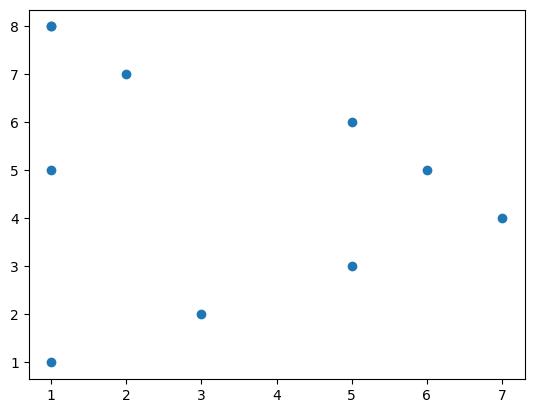

In [25]:
plt.scatter(df["A"], df["B"])
plt.show()

In [26]:
[[np.sqrt(np.sum(np.square(df.iloc[i] - df.iloc[j]))) for i in range(len(df))] for j in range(len(df))]

[[0.0,
  3.0,
  2.23606797749979,
  4.0,
  4.47213595499958,
  3.0,
  6.082762530298219,
  4.123105625617661,
  3.605551275463989,
  5.0],
 [3.0,
  0.0,
  1.4142135623730951,
  7.0,
  6.4031242374328485,
  0.0,
  7.211102550927978,
  4.47213595499958,
  6.324555320336759,
  5.830951894845301],
 [2.23606797749979,
  1.4142135623730951,
  0.0,
  6.082762530298219,
  5.0,
  1.4142135623730951,
  5.830951894845301,
  3.1622776601683795,
  5.0990195135927845,
  4.47213595499958],
 [4.0,
  7.0,
  6.082762530298219,
  0.0,
  4.47213595499958,
  7.0,
  6.708203932499369,
  6.4031242374328485,
  2.23606797749979,
  6.4031242374328485],
 [4.47213595499958,
  6.4031242374328485,
  5.0,
  4.47213595499958,
  0.0,
  6.4031242374328485,
  2.23606797749979,
  3.0,
  2.23606797749979,
  2.23606797749979],
 [3.0,
  0.0,
  1.4142135623730951,
  7.0,
  6.4031242374328485,
  0.0,
  7.211102550927978,
  4.47213595499958,
  6.324555320336759,
  5.830951894845301],
 [6.082762530298219,
  7.211102550927978,
 

In [27]:
distance_matrix = [[np.sqrt(np.sum(np.square(df.iloc[i] - df.iloc[j]))) for i in range(len(df))] for j in range(len(df))]


In [28]:
distance_matrix = np.round(distance_matrix, decimals=2)

In [29]:
distance_matrix

array([[0.  , 3.  , 2.24, 4.  , 4.47, 3.  , 6.08, 4.12, 3.61, 5.  ],
       [3.  , 0.  , 1.41, 7.  , 6.4 , 0.  , 7.21, 4.47, 6.32, 5.83],
       [2.24, 1.41, 0.  , 6.08, 5.  , 1.41, 5.83, 3.16, 5.1 , 4.47],
       [4.  , 7.  , 6.08, 0.  , 4.47, 7.  , 6.71, 6.4 , 2.24, 6.4 ],
       [4.47, 6.4 , 5.  , 4.47, 0.  , 6.4 , 2.24, 3.  , 2.24, 2.24],
       [3.  , 0.  , 1.41, 7.  , 6.4 , 0.  , 7.21, 4.47, 6.32, 5.83],
       [6.08, 7.21, 5.83, 6.71, 2.24, 7.21, 0.  , 2.83, 4.47, 1.41],
       [4.12, 4.47, 3.16, 6.4 , 3.  , 4.47, 2.83, 0.  , 4.47, 1.41],
       [3.61, 6.32, 5.1 , 2.24, 2.24, 6.32, 4.47, 4.47, 0.  , 4.24],
       [5.  , 5.83, 4.47, 6.4 , 2.24, 5.83, 1.41, 1.41, 4.24, 0.  ]])